### Imports


In [2]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Import from .json files

In [3]:
print(*[filename.split(".")[0] for filename in os.listdir("./opinions")], sep="\n")

116728514
28217807
84514582


In [4]:
product_id = input("Enter the product code ^^: ")

In [5]:
opinions = pd.read_json(f"./opinions/{product_id}.json")
opinions

,opinion_id,author,recommendation,stars,content_pl,pros_pl,cons_pl,vote_yes,vote_no,published,purchased,content_en,pros_en,cons_en
0,17488222,e...1,NaN,3.5,Dzień dobry.Zakupiłam z firmy Janshop dwie ław...,"[jakość, trwałość, wygoda]",[],2,1,2023-05-09 12:42:56,2023-04-22 11:22:32,Good morning. I made two benches from Janshop ...,"[quality, durability, convenience]",[]
1,17129934,i...1,1.0,4.0,Jakość akceptowalna . Poprzednia plandeka ( 2x...,[],[],0,0,2023-02-10 12:25:33,2023-01-17 17:22:17,Acceptable quality. The previous tarpaulin (2x...,[],[]
2,17646962,Kamil,1.0,5.0,"Lekki i solidny stojak, bez problemu utrzymał ...","[jakość, trwałość, wygoda]",[],0,0,2023-06-26 11:14:12,2023-06-12 22:41:46,"A light and solid stand, he easily kept a pers...","[quality, durability, convenience]",[]
3,17537245,p...3,1.0,5.0,Osobiście kupowałem drążek wielofunkcyjny mont...,[],[],0,0,2023-05-23 12:12:33,2023-05-09 07:44:57,"Personally, I bought a multifunctional rod mou...",[],[]
4,15369821,Marcin,1.0,5.0,"Ok nie mam tego produktu ani nie kupowałem, al...",[],[],3,0,2021-12-15 13:24:53,2021-12-01 10:56:13,"Ok I don't have this product or bought it, but...",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,17998495,p...e,0.0,0.5,nie to kupiłem lecz regał metalowy,[],[],0,1,2023-10-13 09:59:57,2023-09-22 11:41:32,I didn't buy it but a metal shelf,[],[]
100,17908673,b...a,0.0,1.0,Dalej czekam na produkt,[],"[jakość, trwałość, wygoda]",0,0,2023-09-16 20:51:02,2023-08-17 15:33:14,I am still waiting for the product,[],"[quality, durability, convenience]"
101,15253540,Użytkownik Ceneo,0.0,0.5,Nic takiego nie kupowałem....,[],[],0,1,2021-11-24 16:20:03,2021-11-09 16:28:11,I didn't buy anything like that ....,[],[]
102,18189031,b...o,0.0,1.0,"nie wiem, nie kupowalam tego",[],[],0,1,2023-12-08 10:51:09,2023-11-26 15:01:05,"I don't know, I didn't buy it",[],[]


### Basic statistics

In [6]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros_pl.astype(bool).sum()
cons_count = opinions.cons_pl.astype(bool).sum()
pros_cons_count = opinions.apply(lambda o: o.pros_pl and o.cons_pl, axis=1).astype(bool).sum()
average_rate = opinions.stars.mean()

print(f"The number of opinions: {opinions_count}")
print(f"The number of opinions with listed advantages: {pros_count}")
print(f"The number of opinions with listed disadvantages: {cons_count}")
print(f"The number of opinions in which both advantages and disadvantages have been listed: {pros_cons_count}")
print(f"The average rate of the product: {average_rate:.2f}")

The number of opinions: 104
The number of opinions with listed advantages: 39
The number of opinions with listed disadvantages: 2
The number of opinions in which both advantages and disadvantages have been listed: 0
The average rate of the product: 4.44


In [7]:
pros = opinions.pros_en.explode().value_counts()
cons = opinions.cons_en.explode().value_counts()
print(pros)
print(cons)

pros_en
quality        39
convenience    39
durability     38
Name: count, dtype: int64
cons_en
quality        2
durability     2
convenience    2
Name: count, dtype: int64


### Charts

In [32]:
if not os.path.exists("./pie_charts"):
    os.mkdir("./pie_charts")
if not os.path.exists("./bar_charts"):
    os.mkdir("./bar_charts")

In [8]:
recommendation = opinions.recommendation.value_counts(dropna=False).reindex([False, True, np.nan])
recommendation

recommendation
False    11
True     90
NaN       3
Name: count, dtype: int64

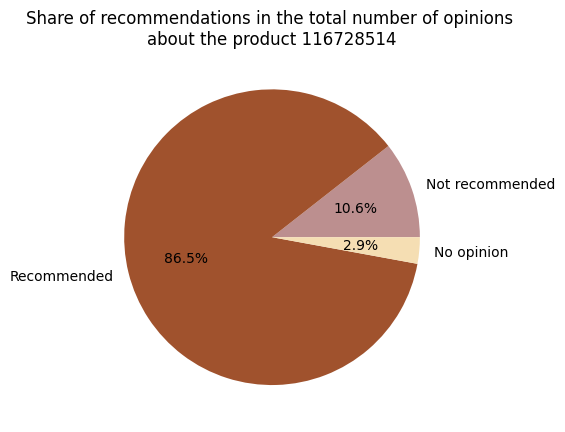

In [9]:
recommendation.plot.pie(
    label = "",
    labels = ["Not recommended", "Recommended", "No opinion"],
    colors = ["rosybrown", "sienna", "wheat"],
    autopct = lambda v: f"{v:.1f}%" if v > 0 else "",
    title = f"Share of recommendations in the total number of opinions \nabout the product {product_id}"
)
plt.savefig(f"/pie_charts/{product_id}.png")
plt.show()

In [23]:
stars = opinions.stars.value_counts().reindex(list(np.arange(0,5.5,0.5)), fill_value=0)
stars

stars
0.0     0
0.5     6
1.0     5
1.5     0
2.0     0
2.5     0
3.0     0
3.5     3
4.0     2
4.5     9
5.0    79
Name: count, dtype: int64

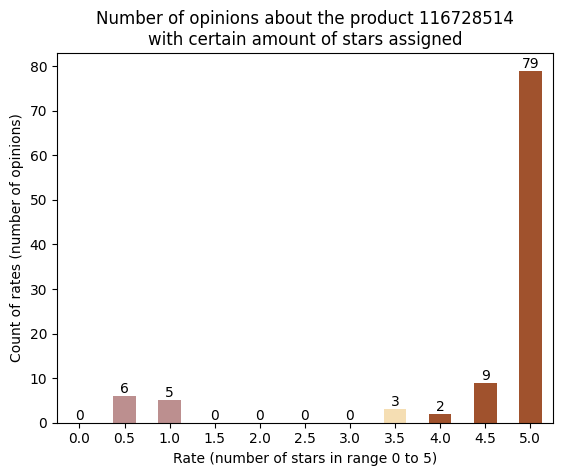

In [31]:
ax = stars.plot.bar(
    xlabel = "Rate (number of stars in range 0 to 5)",
    ylabel = "Count of rates (number of opinions)",
    title = f"Number of opinions about the product {product_id}\nwith certain amount of stars assigned",
    color = ["rosybrown" if x<3 else "sienna" if x>3.5 else "wheat" for x in stars.index]
)
plt.xticks(rotation=0)
plt.bar_label(container=ax.containers[0])
plt.savefig(f"/bar_charts/{product_id}.png")
plt.show()